<a href="https://colab.research.google.com/github/raj-abhishek12/Capstone-1-Airbnb-booking-analysis/blob/main/Team_Notebook(Airbnb)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from collections import Counter

#NLP
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#word cloud
from wordcloud import WordCloud, ImageColorGenerator
sns.set_theme(style="ticks", color_codes=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path= '/content/drive/MyDrive/Data/Capstone -1 Airbnb/Airbnb NYC 2019.csv'
df=pd.read_csv(path)

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Capstone -1/Airbnb NYC 2019.csv')

In [7]:
df.shape

(48895, 16)

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Observations:**

Total 16 columns are present in the dataset.

total observations are 48895.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Observations**

Min of Price variable is 0, max is 10000. Mean price is 152. On an average people stay 7 days in a room.

In [14]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**observations:**

There are total four columns with null values.

name column is having total 16 null values.

host_name is having 21 null values.

last_review and reviews_per_month are having more null values.

we will look at the columns and decide what we can do with them.

**Missing value handling :**

In [15]:
#missing value in percentage.
Total = df.isnull().sum().sort_values(ascending = False)#total per column
missing_values= round(((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending = False),2)
#missing_value data frame.
missing_total_percentage = pd.concat([Total,missing_values],axis = 1,keys = ['Total','Percentage'],sort = False).sort_values('Total',ascending=False)
missing_total_percentage

,Total,Percentage
last_review,10052,20.56
reviews_per_month,10052,20.56
host_name,21,0.04
name,16,0.03
id,0,0.00
host_id,0,0.00
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00



last_review has value which is in date yyyy-mm-dd format. So, I'm changing null value to 0000-00-00

reviews_per_month has numerical value so I'll replace the null value with the median value of that column.

name and host_name column have categorical value so I'll replace the null value with the "missing" value



In [16]:
df['last_review'] = df['last_review'].fillna("0000-00-00")

In [17]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace = True)

In [18]:
## code for replacing Nan values in columns Name and host_name "missing"

df['name']= df['name'].fillna('missing')
df['host_name'] = df['host_name'].fillna('missing')

After cleaning the null values in the dataset validate that all null values are removed or not


In [19]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [20]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Now let's check the unique value in neighbourhood group

Analyse the unique values of neighbourhood group as this column will appear very handy for later analysis

In [22]:
#Analyse the unique values of neighbourhood group as this column will appear very handy for later analysis
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Now let's examine the unique value present in neighbourhood

In [23]:
len(df.neighbourhood.unique())

221

let's examine the unique value present in room_type

In [24]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [26]:
#stop words removal:
"""
1) download the nltk stopwords in english.
2) replace pantuation and special symbols.
3) make it string and convert all into lower case.
then split the words and compair each with the stopwords and keep only those which are not in stopword list.
"""
def stop_word_removal(df):
  stop = stopwords.words('english')
  df.name = df.name.str.replace("[^\w\s]", "").str.lower()
  df.name = df.name.apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [27]:
text = stop_word_removal(df)
text = " ".join(str(each) for each in df.name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


<Figure size 720x432 with 0 Axes>

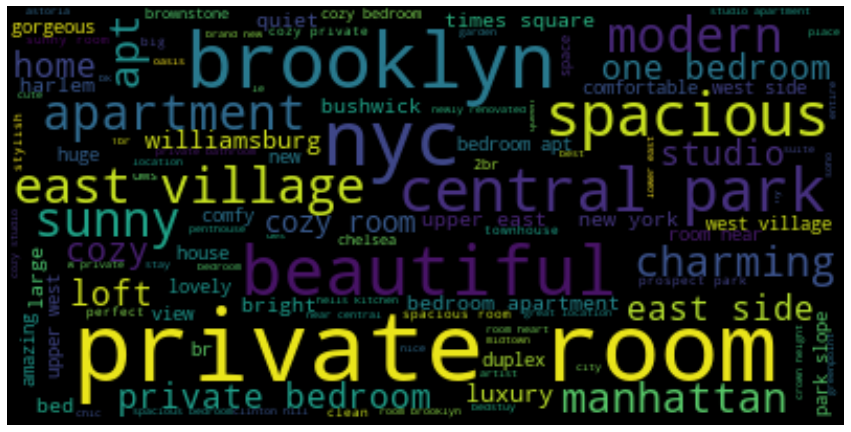

In [28]:
#  generator.
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=300, background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

**Obsevations**

This word cloud shows us the most frequent words.

In [30]:
#after removing stop words.
df.name

0                            clean quiet apt home park
1                                skylit midtown castle
2                               village harlemnew york
3                         cozy entire floor brownstone
4          entire apt spacious studioloft central park
                             ...                      
48890    charming one bedroom newly renovated rowhouse
48891        affordable room bushwickeast williamsburg
48892             sunny studio historical neighborhood
48893               43rd st time squarecozy single bed
48894                trendy duplex heart hells kitchen
Name: name, Length: 48895, dtype: object

Top 50 words from word_cloud:

In [31]:
#list of words.
name_list = list(df.name.values)
words = []
for i in name_list:
  words+=i.split()


In [32]:
#let's see top 50 used words .
#https://www.kite.com/python/docs/collections.Counter.most_common
_top_50_words=Counter(words).most_common()
_top_50_words=_top_50_words[0:50]

In [34]:
top_50_words = pd.DataFrame(_top_50_words,columns = ['words','frequency'])

[Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '2'),
 Text(0, 0, 'park'),
 Text(0, 0, 'east'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'williamsburg'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'village'),
 Text(0, 0, 'nyc'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'large'),
 Text(0, 0, 'loft'),
 Text(0, 0, 'home'),
 Text(0, 0, 'modern'),
 Text(0, 0, 'central'),
 Text(0, 0, 'bright'),
 Text(0, 0, 'luxury'),
 Text(0, 0, '1br'),
 Text(0, 0, 'location'),
 Text(0, 0, 'west'),
 Text(0, 0, 'w'),
 Text(0, 0, 'new'),
 Text(0, 0, 'bed'),
 Text(0, 0, 'side'),
 Text(0, 0, 'charming'),
 Text(0, 0, 'bushwick'),
 Text(0, 0, 'upper'),
 Text(0, 0, 'midtown'),
 Text(0, 0, 'quiet'),
 Text(0, 0, 'one'),
 Text(0, 0, 'brownstone'),
 Text(0, 0, 'great'),
 Text(0, 0, 'br'),
 Text(0, 0, 'ha

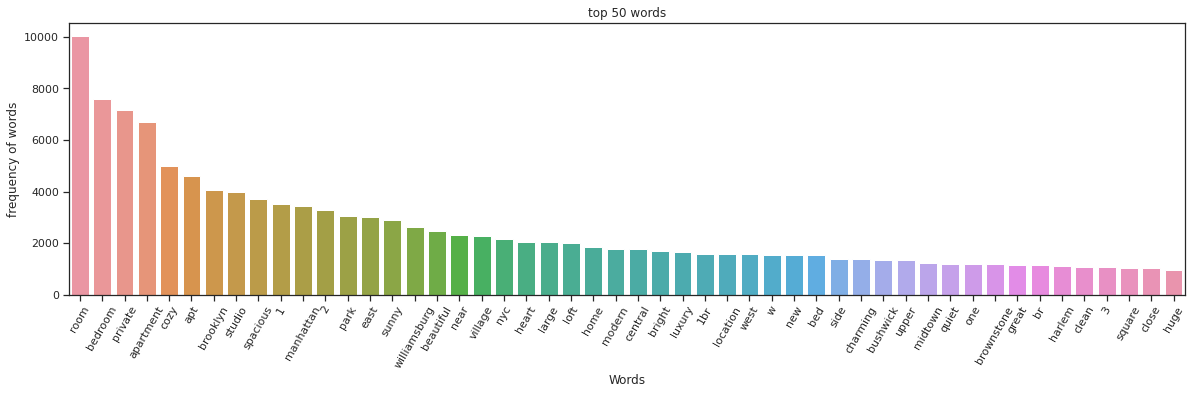

In [35]:
# visualization
plt.figure(figsize=(20,5))
ax_1= sns.barplot(x='words',y='frequency',data = top_50_words)
ax_1.set_title('top 50 words')
ax_1.set_ylabel('frequency of words')
ax_1.set_xlabel('Words')
ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=60)

**Observation**

The above observation shows us the top 50 words and there frequency.

These words can he help full in model buliding point of view.

**2) column_no_2 host_name:**

In [36]:
df['host_name'].nunique()

11453

**Observations:**

host_name this column is defining the name of host(owner).

There are 11452 unique hosts/owners we can use this featue directly in model building just by encoding it.

response encoding will be usefull for this feature. we can take nan value as one data point for model building.

**3) column_no_3 neighbourhood_group:**

In [38]:
df['neighbourhood_group']

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

Let's examine which hosts have the biggest amount of listings on Airbnb platform

In [39]:
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [40]:
top_host=pd.DataFrame(top_host)
top_host.reset_index(inplace=True)
top_host.rename(columns={'index':'Host_ID', 'host_id':'Listings'}, inplace=True)
top_host

,Host_ID,Listings
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

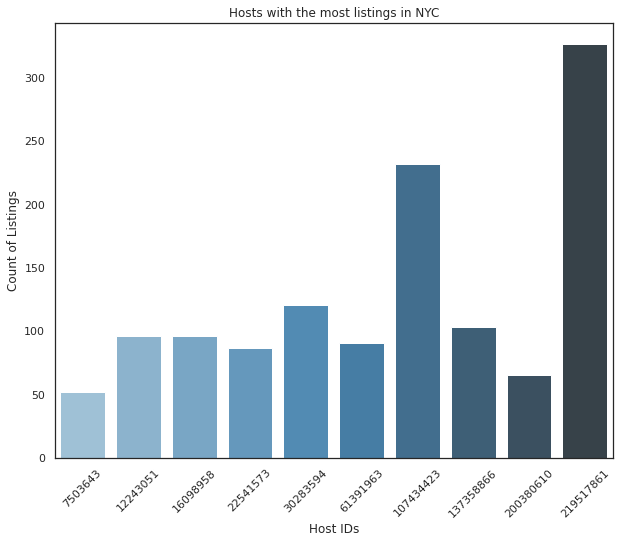

In [41]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
vs_1=sns.barplot(x="Host_ID", y="Listings", data=top_host,
                 palette='Blues_d')
vs_1.set_title('Hosts with the most listings in NYC')
vs_1.set_ylabel('Count of Listings')
vs_1.set_xlabel('Host IDs')
vs_1.set_xticklabels(vs_1.get_xticklabels(), rotation=45)

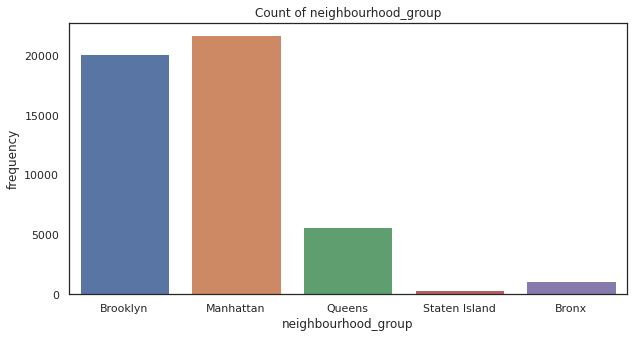

In [42]:
#count_plot
plt.figure(figsize=(10,5))
ax_3 = sns.countplot(x='neighbourhood_group',data = df)
ax_3.set_title('Count of neighbourhood_group')
ax_3.set_ylabel('frequency')
ax_3.set_xlabel('neighbourhood_group')
plt.show()

**Observations:**

Brooklyn and Manhattan have the highest hotel/room bookings.

**4) column_no_4 neighbourhood :**

In [43]:
neigh_unique = df['neighbourhood'].value_counts()
neigh_unique

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

**Observations:**

There are 221 unique neighbour.

Top 50 most common neighbours

In [44]:
#.most_common() Return a list of the n most common elements and their counts from the most common to the least.
top_50_=Counter( df['neighbourhood']).most_common()
top_50_=top_50_[0:50]
top_50_[:20]

[('Williamsburg', 3920),
 ('Bedford-Stuyvesant', 3714),
 ('Harlem', 2658),
 ('Bushwick', 2465),
 ('Upper West Side', 1971),
 ("Hell's Kitchen", 1958),
 ('East Village', 1853),
 ('Upper East Side', 1798),
 ('Crown Heights', 1564),
 ('Midtown', 1545),
 ('East Harlem', 1117),
 ('Greenpoint', 1115),
 ('Chelsea', 1113),
 ('Lower East Side', 911),
 ('Astoria', 900),
 ('Washington Heights', 899),
 ('West Village', 768),
 ('Financial District', 744),
 ('Flatbush', 621),
 ('Clinton Hill', 572)]

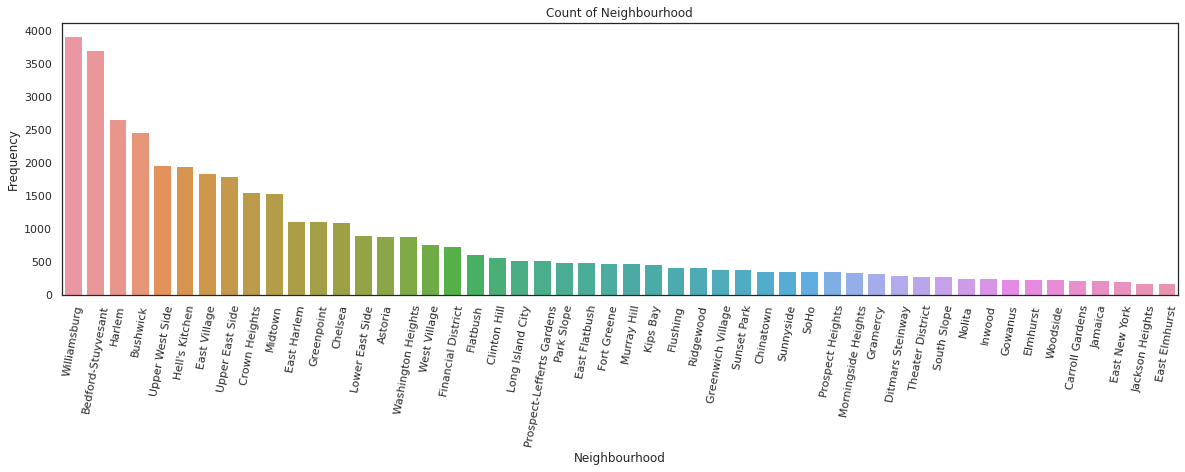

In [45]:
#count_plot
plt.figure(figsize=(20,5))
ax_4 = sns.barplot(x='neighbourhood',y='count',data = pd.DataFrame(top_50_,columns=['neighbourhood','count'][:20]))
ax_4.set_title('Count of Neighbourhood')
ax_4.set_ylabel('Frequency')
ax_4.set_xlabel('Neighbourhood')
ax_4.set_xticklabels(ax_4.get_xticklabels(), rotation=80);
plt.show()

**Observations:**

The above plot shows us some of the top Neighbours towns we can say.

People like to stay at these towns more often.

**5) column_no_5 latitude & longitude:**

In [50]:
df[['latitude','longitude']]

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
48890,40.67853,-73.94995
48891,40.70184,-73.93317
48892,40.81475,-73.94867
48893,40.75751,-73.99112


**Observation:**

we can see the exact locations from this columns.

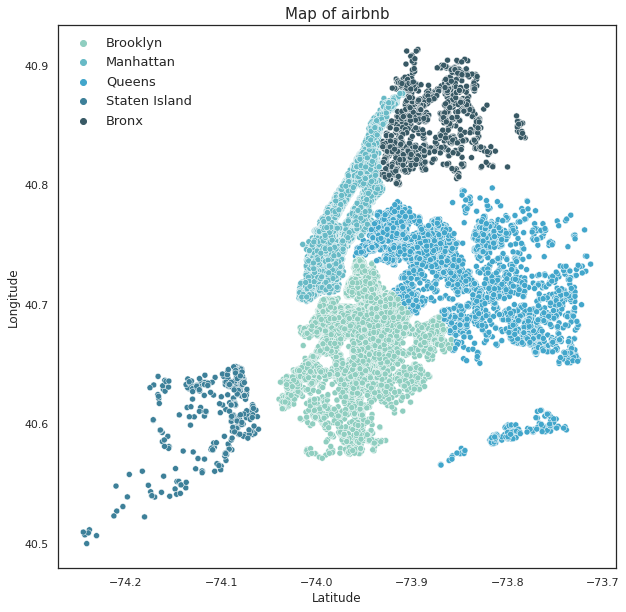

In [52]:
#  map of hosts

plt.figure(figsize=(10,10))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

**Observations**

latitude and longtitude visulalizes us that Brooklyn and Manhattan are the most dense with hotels and apartments followed by queens island.

**6) Column_no_6 room_type:**

In [54]:
df[['room_type']].nunique()

room_type    3
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


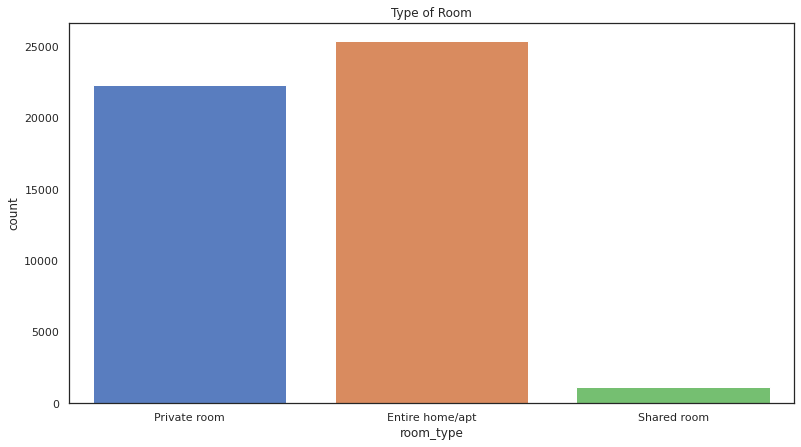

In [61]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

**Observations**

There are three types of rooms

Namely:

1.Private room

2.Entire home/apt room_type

3.Shared room.

4.People mostly prefered to take whole apartment on rent followed by Private room.

5.very few people prefered to have shared rooms.

We will try to catogorise the 'price'like cheep,affordable and expensive and then analyse the 'price' for 'room_type' as per it.

**7) column_no_7 price:**

In [59]:
df[['price']].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


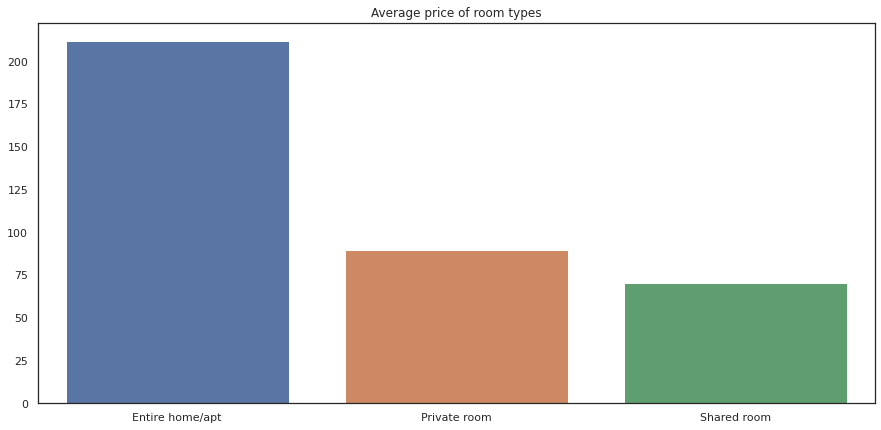

In [60]:
d = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
fig, ax= plt.subplots(figsize=(15,7))
sns.barplot(d.index.tolist(), d.values, ax=ax)
ax.set_title('Average price of room types')
fig.show()

Above graphs is for analysing the average cost of stay in different room types.

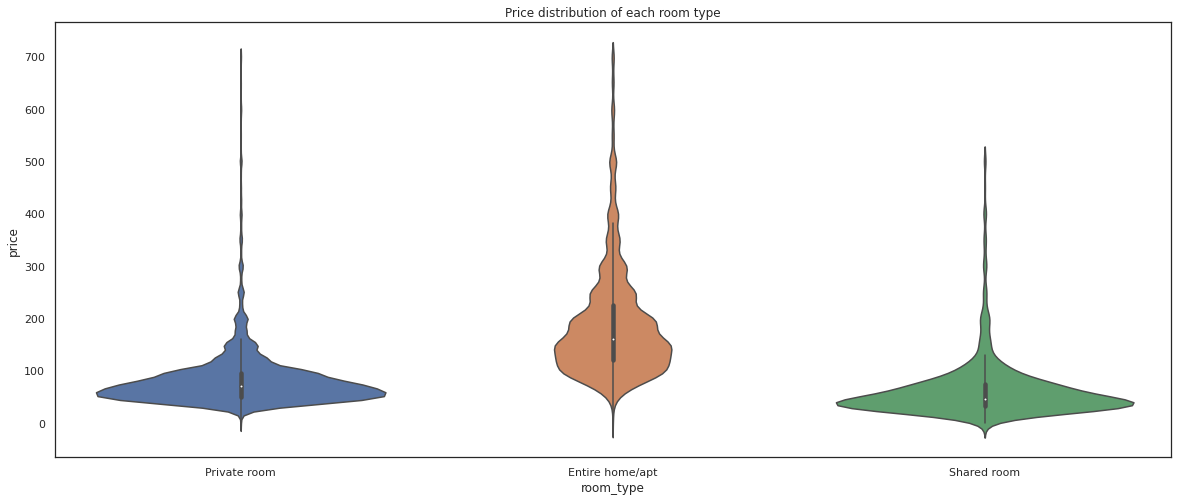

In [62]:
fig, ax= plt.subplots(figsize=(20,8))
sns.violinplot(x="room_type", y="price", data=df[df['price'] <= 700], ax=ax)
ax.set_title('Price distribution of each room type')
fig.show()

**Observations**

we have considered to devide the whole price range into three catogories

1.cheep (price range below or equal to 80$)

2.Affordable(for price range 80 to 500$)

3.Expensive(for price range more then 500$) so, it look like people have more intrest in having "affordable" rooms/apartments rathre then having cheep and expensive rooms.

**8) column_no_8 minimum_nights:**

In [63]:
df[['minimum_nights']].value_counts()

minimum_nights
1                 12720
2                 11696
3                  7999
30                 3760
4                  3303
                  ...  
182                   1
183                   1
184                   1
185                   1
1250                  1
Length: 109, dtype: int64

In [65]:
df[['minimum_nights']].describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


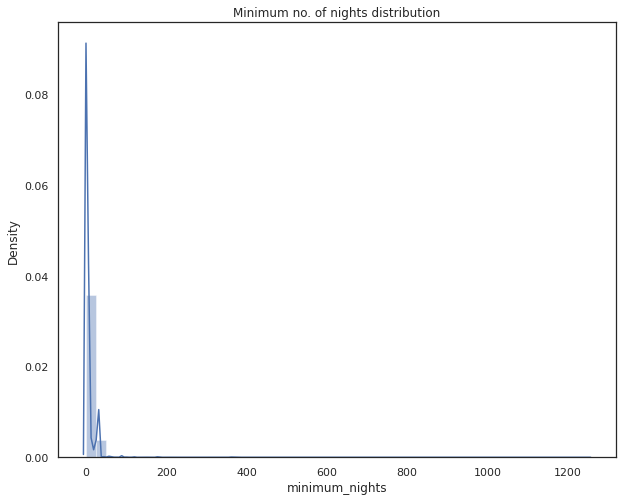

In [67]:
ax = sns.distplot(df.minimum_nights)
plt.title('Minimum no. of nights distribution')
plt.show()

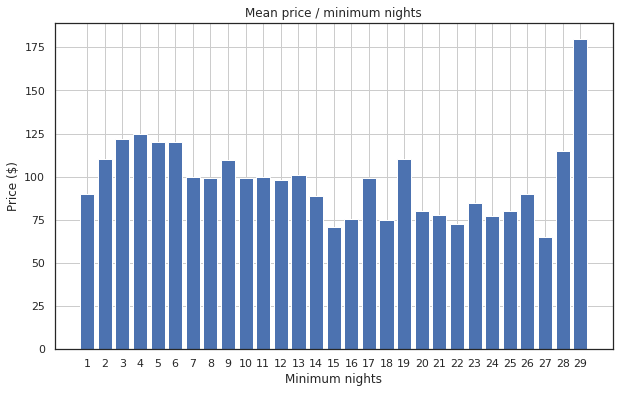

In [68]:
d = df[df['minimum_nights'] < 30].groupby('minimum_nights')['price'].median()
fig = plt.figure(figsize=(10,6))
plt.xticks(np.arange(min(d.keys().tolist()), max(d.keys().tolist())+1, 1.0))
plt.bar(d.keys().tolist(), d.tolist())
plt.title('Mean price / minimum nights')
plt.xlabel('Minimum nights')
plt.ylabel('Price ($)')
plt.grid(True)

1.It's generally cheaper to stay in rooms between 14 and 28 nights.​

2.Usually, the minimum required nights to stay in a room is arround 2

**Observations**

most of the neights booked are from 0 to less then 100 days. we will plot further and see.

we can see that there may be outliers.we can plot and check it.

we will plot box plot and check.

log scale can show us the shape of skwed data.

Note:How do you handle skewed data in Python? One way of handling right, or left, skewed data is to carry out the logarithmic transformation on our data. For example, np.log(x) will log transform the variable x in Python. There are other options as well as the Box-Cox and Square root transformations.


max booking is for more then a year or we can say for few years.

In [70]:
from scipy.stats import boxcox
data_box_cox_transform = boxcox(df.minimum_nights)
data_box_cox_transform

(array([0.        , 0.        , 0.86162699, ..., 1.41767289, 0.        ,
        1.28379566]), -0.46182559978389276)

Text(0.5, 1.0, 'Minimum no.of nights distribution')

<Figure size 720x360 with 0 Axes>

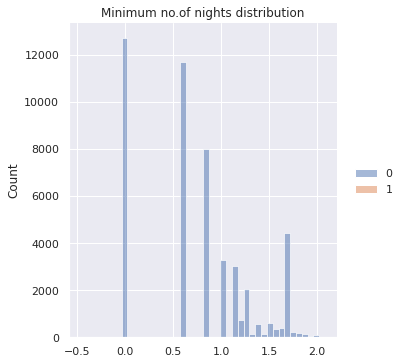

In [71]:
#plot for box-cox transformed data.
sns.set_theme(); np.random.seed(0)
plt.figure(figsize=(10,5))

ax = sns.displot(data_box_cox_transform)

plt.title('Minimum no.of nights distribution')

**Observations:**

it's very clear that the data is right skwed.

In [73]:
log_transfrom = np.log(df['minimum_nights'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Minimum no.of nights distribution')

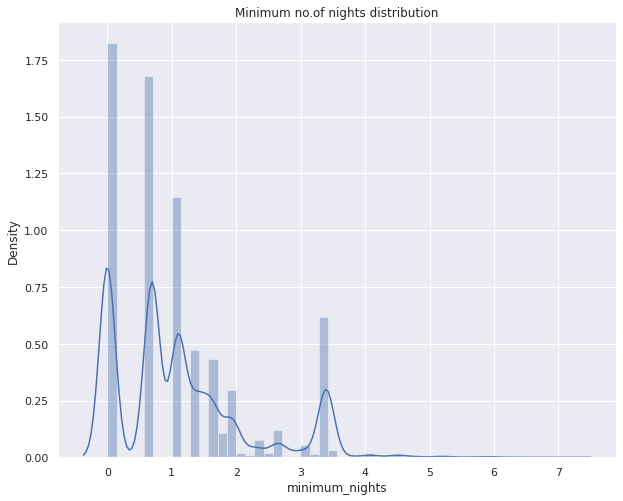

In [74]:
ax = sns.distplot(log_transfrom)
plt.title('Minimum no.of nights distribution')

**Observations**

This plots shows that majority of room booking is one for 1 to 4 days.

Box-Cox transformed plot strictly shows that the majority of booking lies between 0 to 3 days.we have set the lambda parameter not equal to zero so it by defination of bax-cox transform selected the best value of lambda.

**9) column_no_9 Number_of_reviews:**

In [76]:
df[['number_of_reviews']].value_counts()

number_of_reviews
0                    10052
1                     5244
2                     3465
3                     2520
4                     1994
                     ...  
352                      1
351                      1
341                      1
340                      1
629                      1
Length: 394, dtype: int64

In [77]:
df[['number_of_reviews']].describe()

,number_of_reviews
count,48895.000000
mean,23.274466
std,44.550582
min,0.000000
25%,1.000000
50%,5.000000
75%,24.000000
max,629.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'number_of_reviews')

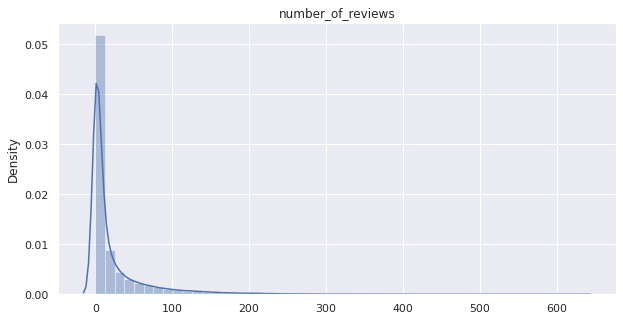

In [79]:
plt.figure(figsize=(10,5))
ax = sns.distplot(x=df["number_of_reviews"])
plt.title('number_of_reviews')

Observations

Number of reviews are highly dense form 0 to 100 reviews.

we can say that most of the rooms are not rated and those which are frequently occupied only those are rated.

maximun 629 times the perticular room is rated.

Average rating is around 23.

**10) column_no_10 last_review:**

In [80]:
df[['last_review']]

,last_review
0,2018-10-19
1,2019-05-21
2,0000-00-00
3,2019-07-05
4,2018-11-19
...,...
48890,0000-00-00
48891,0000-00-00
48892,0000-00-00
48893,0000-00-00


**Observations**

This is the column which signifies the last time the room was given review.

secondly,there are certain rooms which are not reviewd at all, it acan happen that no one had visited till now or not bothered to give review to those rooms.

Also there are nan valuse thse values can either be filled with the help of domaiin expert or with suitable value like since no one has reviwed we will fill it up with 'zeros'.

**9) column_no_9 reviews_per_month:**

In [82]:
df[["reviews_per_month"]].describe()

,reviews_per_month
count,48895.000000
mean,1.238930
std,1.520861
min,0.010000
25%,0.280000
50%,0.720000
75%,1.580000
max,58.500000


**Observations**:

max is 58 times the rating is given.

min is 0.

75% of data is for 1.5 time rating.



**10) column_no_10 calculated_host_listings_count:**

In [84]:
Counter(df['calculated_host_listings_count']).most_common(50)

[(1, 32303),
 (2, 6658),
 (3, 2853),
 (4, 1440),
 (5, 845),
 (6, 570),
 (8, 416),
 (7, 399),
 (327, 327),
 (9, 234),
 (232, 232),
 (10, 210),
 (96, 192),
 (12, 180),
 (13, 130),
 (121, 121),
 (11, 110),
 (52, 104),
 (103, 103),
 (33, 99),
 (49, 98),
 (91, 91),
 (87, 87),
 (15, 75),
 (14, 70),
 (23, 69),
 (34, 68),
 (17, 68),
 (65, 65),
 (31, 62),
 (28, 56),
 (18, 54),
 (50, 50),
 (25, 50),
 (47, 47),
 (43, 43),
 (20, 40),
 (39, 39),
 (37, 37),
 (32, 32),
 (30, 30),
 (29, 29),
 (27, 27),
 (26, 26),
 (21, 21),
 (19, 19),
 (16, 16)]

In [87]:
print('1. There is one host who is {} time listed. '.format(df.calculated_host_listings_count.max()))
print('2. This is the corresponding host_id {} who is having highest listing. ' .format(df.host_id.value_counts().idxmax()))
print('2. This is the corresponding host_id {} who is having lowest listing. ' .format(df.host_id.value_counts().idxmin()))

1. There is one host who is 327 time listed. 
2. This is the corresponding host_id 219517861 who is having highest listing. 
2. This is the corresponding host_id 28638583 who is having lowest listing. 


**11) column_no_11 availability_365:**

In [88]:
df[['availability_365']].value_counts()

availability_365
0                   17533
365                  1295
364                   491
1                     408
89                    361
                    ...  
195                    26
196                    24
183                    24
181                    23
202                    20
Length: 366, dtype: int64

Text(0.5, 1.0, 'Scatterplot_availability_365')

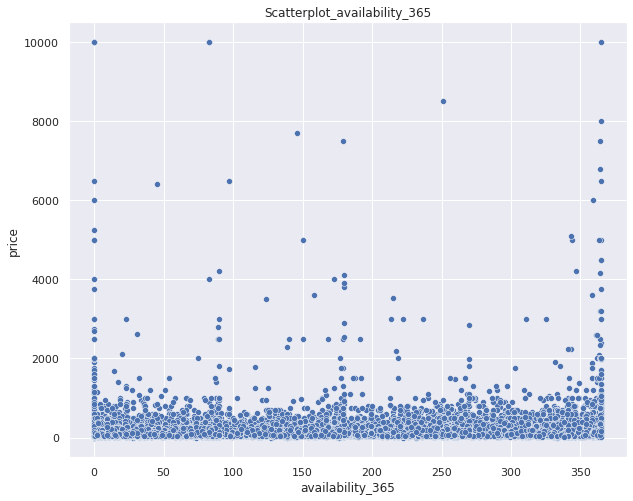

In [90]:
ax = sns.scatterplot(data=df,x='availability_365',y='price')
plt.title("Scatterplot_availability_365")

**Observations**

From above plot we can see that most of the available rooms are in the proce range of 0 to 2000.

Very few are available for price above 2000$,this is quite obivious that there are very few peoples who prefer to have expensive rooms.

In [91]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Lets find the relation between neighbourhood_group and price:**

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

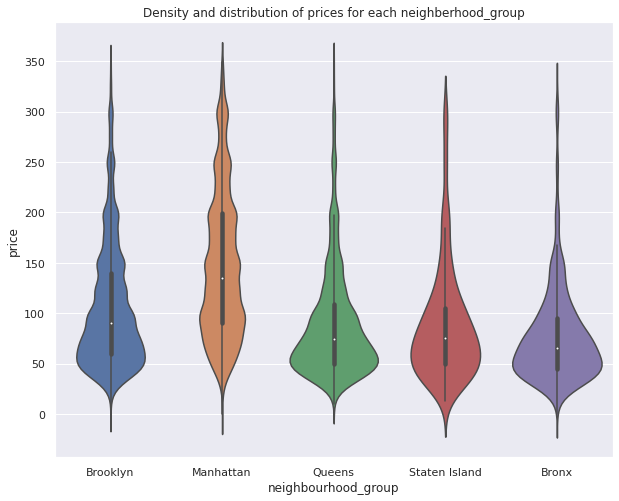

In [92]:
#creating a sub-dataframe with no extreme values / less than 500
sub_6=df[df.price < 350]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

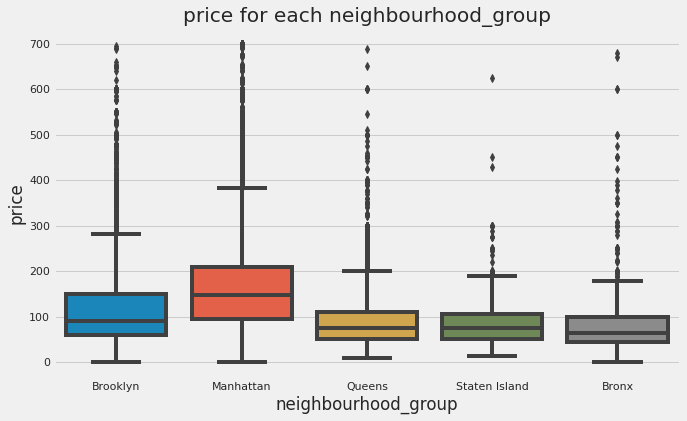

In [94]:
plt.style.use('fivethirtyeight')

price_500 = df[df.price <700]
plt.figure(figsize=(10,6))
plt.title("price for each neighbourhood_group")
sns.boxplot(y= 'price',x= 'neighbourhood_group',data=price_500)
plt.show()

**Observations:**

We can see that Manhattam is the most expensive destination immediatly followed by Brooklyn.

Queens, staten island and Bronx, are having price range less as compaired to other two.

**Relationship between neighbourhood_group and median price.**

In [96]:
#grouping median price with neighbourhood_group.
neigh_group_price_group = df.groupby(['neighbourhood_group']).agg({'price':'median'}).reset_index()

In [97]:
neigh_group_price_group

,neighbourhood_group,price
0,Bronx,65.0
1,Brooklyn,90.0
2,Manhattan,150.0
3,Queens,75.0
4,Staten Island,75.0


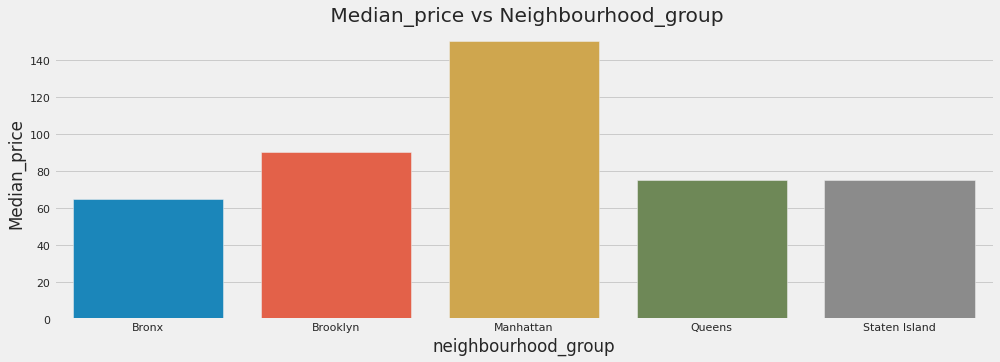

In [98]:
#barplot for price variation and neighbourhood.
plt.figure(figsize=(15,5))
ax_12 = sns.barplot(x = 'neighbourhood_group',y = 'price',data = neigh_group_price_group)
ax_12.set_title(' Median_price vs Neighbourhood_group')
ax_12.set_xlabel('neighbourhood_group')
ax_12.set_ylabel("Median_price")
plt.show()

**Observations:**

'Manhattan' is the area having highest median price,followed by Brooklyn.

Lets find the relation between neighbourhood and price:

We will make group of all neighbourhood who are having median of price varable.

Median have less impact of outliers as compaired to mean.



In [100]:
neigh_price_group = df.groupby(['neighbourhood']).agg({'price':'median'}).reset_index()

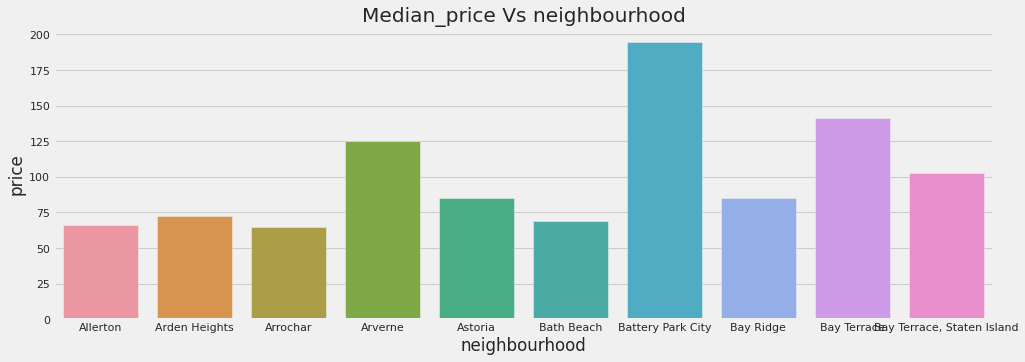

In [101]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'neighbourhood',y = 'price',data = neigh_price_group.head(10))
plt.title("Median_price Vs neighbourhood")
plt.show()

<Figure size 1080x432 with 0 Axes>

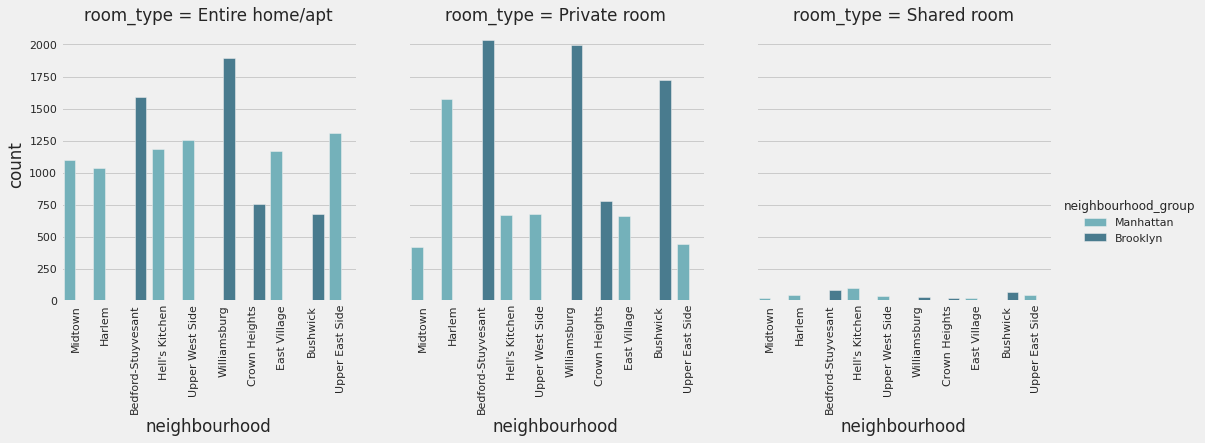

In [102]:
# top neighbourhoods with category of room type

top_neigh = df['neighbourhood'].value_counts().reset_index().head(10)
top_neigh = top_neigh['index'].tolist()

plt.figure(figsize=(15,6))
vis = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=df.loc[df['neighbourhood'].isin(top_neigh)], kind='count', palette='GnBu_d')
vis.set_xticklabels(rotation=90)

Amazing, but let' breakdown on what we can see from this plot. First, we can see that our plot consists of 3 subplots - that is the power of using catplot; with an interesting output, we can easily proceed with comparing distributions among interesting attributes.

x and y axes stay exactly the same for each subplot, X-axis observations we want to count and Y-axis represents a count of observations. However, there are 2 more important elements: hue and column; those 2 differentiate subplots. After we specify the column and determined hue we are able to observe and compare our x and y axes among specified column as well as color-coded. So, what do we learn from this? The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods.

Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

**Summary**

Airbnb Booking Analysis project was done by group of 3 members – Abhishek Raj​, A Saikumar​ and Vishwanath Ravishankar Kalayane. In this project we got 1 different csv files as an input. The Csv file is Airbnb NYC 2019.csv.

So, we each of us exploring dataset by our own way and showing our own thought in team colab notebook.

**Abhishek raj** 

Initially I started with looking at dataset available to us for the Airbnb project. I went through various columns available within each of the databases tried to make sense of what all data is available to us. I quickly understood that I can found some common statistics pertaining to neighbourhood as well as host_id. I found that Manhattan is the most focussed place in New York for hosts to do their business. As people loved to stay when in need maximum  number of nights in Entire  Apartment and Brooklyn stands second highest focussed  place by people. Also,  as the average cost in Brooklyn  is 80USD which is less than Manhattan. Airbnb can increase number of entire apartment in Brooklyn. When we were analysing top rated host then we found Dona and jj which were the top rated host per number of reviews. I tried to visualise availability of rooms in a year in neighbourhood_group.

**Vishwanath Ravishankar Kalayane​**

Initially I started with looking at each database available to us for the Airbnb project. I went through various columns available within each of the databases tried to make sense of what all data is available to us In this simple yet power full way we had done the EDA on Airbnb dataset. certainly this is not the end  rather this this the start we can say as per business requirement changes we need to find the insights in that direction and justify the business problems. There can be n-number of questions and n-number of dimension to explore the dataset and find the insight from them, this there is no limit unless the business constrain is solved.

**A Saikumar**

When I start to exploring The modelling I observed  that factors already mentioned above have influence on price: time of the year, location, number of bedrooms, bathrooms, beds and accomodates;
The host qualities are important: number of host's listings, number of years since being the host, time in which the host responds to the inquiries;
The pricing might depend on reviews: number of reviews and review scores.

Conclusions

1) NYC shared rooms tend to be grouped in the city centre, maybe becuse there are thought for travelers who want to visit the most iconic city places.

2) Relating the price/popularity variables suggest that people who travel and use Airbnb tend to prefer the posts which are cheaper.

3)The availability of rooms in a year is highest in Queens Island and lowest in Brooklyn.

4) Top most place in neighbourhood is williamsburg and Bedford.

5) As people loved to stay when  in need maximum  number of nights in Entire  Apartment and Brooklyn stands second highest focussed  place by people. Also,  as the average cost in Brooklyn  is 80USD which is less than Manhattan. Airbnb can increase number of entire apartment in Brooklyn.

6) There are two types of user posting rooms: Professionals, which are outliers, each one holding a high number of rooms; and Amateurs, who usually have only a few. Although amateurs can be making money as a business to, their volume is clearly inferior to the professional ones.

7) The professional posts are located in the city centre.
The way rooms are announced is different between professionals and amateurs. The first use more objective terms to describe the room whereas the second use more subjective.

8) Having a room "near to" things affect to popularity (maybe it's a good idea to include this words in the title of the room).